In [26]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import MinCovDet
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (9,6)
sns.set_style('darkgrid')

In [17]:
x,y = load_wine(True)

wine = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]), columns = load_wine()['feature_names'] + ['target'])
wine.shape

(178, 14)

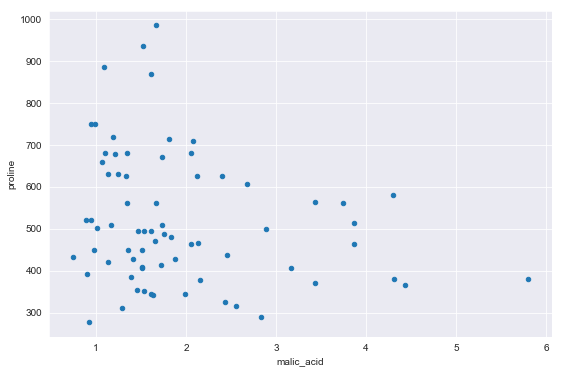

In [60]:
use_ftrs = ['malic_acid', 'proline']
df = wine.loc[wine.target==1,use_ftrs]
df.plot.scatter(*use_ftrs)
    

#### Empirical Covariance

Plot 3 stds of the 2D Distribution

(100, 1100)

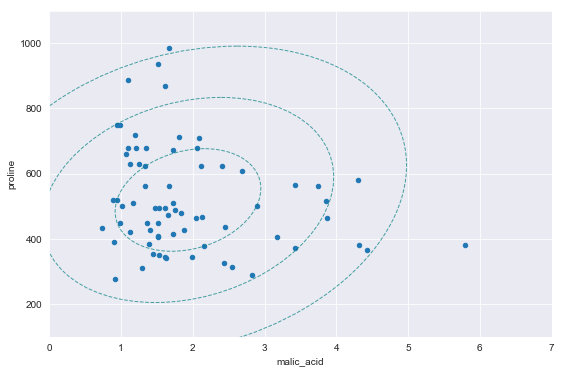

In [64]:
# Plot ellipsoids to illustrate std deviations 
# fromt the mean
cov = df.cov()
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ax = df.plot.scatter(*use_ftrs)
for j in range(1, 4):
    ell = Ellipse(xy=df.mean().values,
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), 
                  color= 'teal', linestyle='--', alpha=0.7)
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.xlim(0, 7)
plt.ylim(100,1100)

(100, 1100)

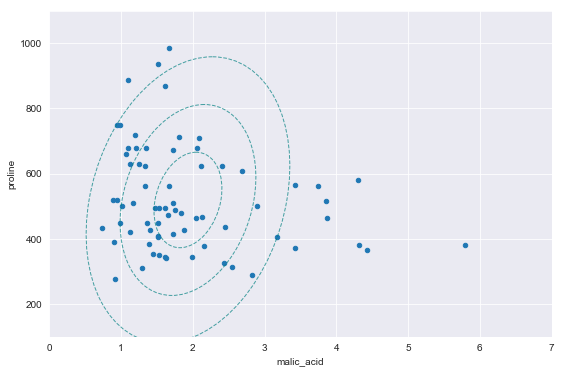

In [67]:
# With Robust Covariance
mcd = MinCovDet(random_state = 1111)
mcd.fit(df)

cov = mcd.covariance_
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ax = df.plot.scatter(*use_ftrs)
for j in range(1, 4):
    ell = Ellipse(xy=df.mean().values,
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), 
                  color= 'teal', linestyle='--', alpha=0.7)
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.xlim(0, 7)
plt.ylim(100,1100)